# Hritvikk Gupta
 <font color = "red">***Data Science and Business Analytics Intern***<br>
***The Sparks Foundation :: Graduate Rotational Internship Program (GRIP)***</font>

# Task 1 : Prediction using Supervised ML
 <font color = "blue"> **Aim: To Predict the percentage of a student based on the number of study hours** </font>

## Step 1 : Importing All Libraries Required 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
print("All Libraries Imported successfully!")

All Libraries Imported successfully!


## Step 2 : Reading Dataset

In [2]:
df = pd.read_csv('http://bit.ly/w-data')
print("Dataset Read successfully!")

Dataset Read successfully!


In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Step 3 : Data Analysis

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


## Step 4 : Data visualization 

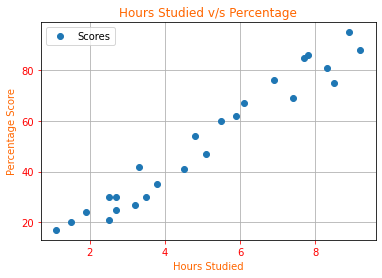

In [6]:
ax=df.plot(x = 'Hours', y='Scores',style='o')
plt.title('Hours Studied v/s Percentage').set_color('#ff6600')
plt.xlabel('Hours Studied').set_color('#ff6600')
plt.ylabel('Percentage Score').set_color('#ff6600')
mpl.rcParams['grid.color'] = 'red'
mpl.rcParams.update({'font.size': 15})
ax.tick_params(axis='x', colors ='red')
ax.tick_params(axis='y', colors ='red')
plt.grid()
plt.show()


<font color = "yellow">From the graph above, we can clearly see that there is a <font color = "red"> positive linear relation  </font>between the number of hours studied and percentage of score. </font>

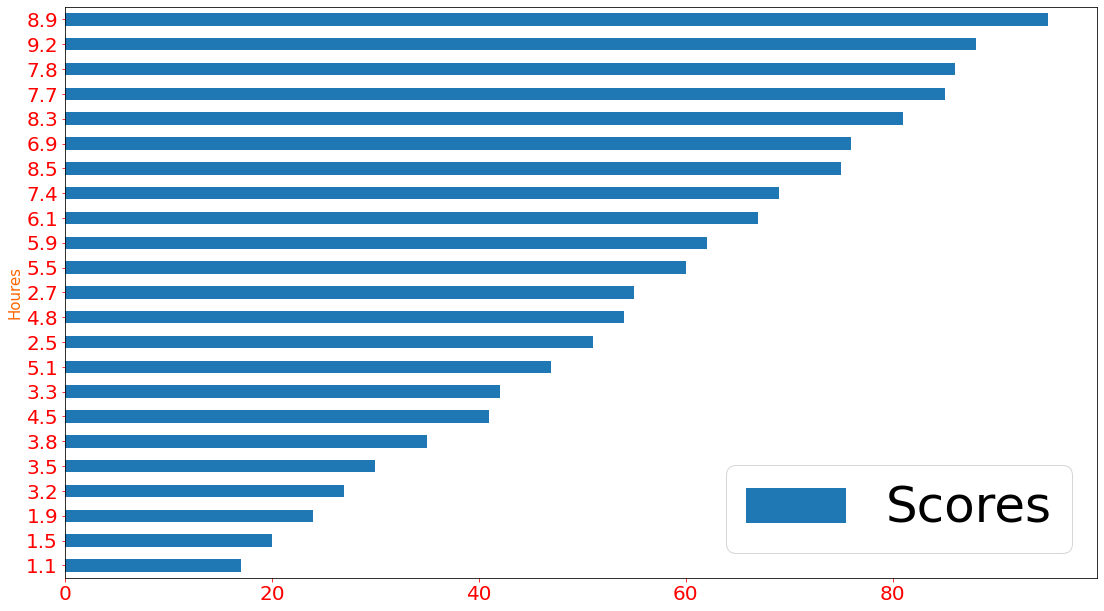

In [7]:
score_totals = df.groupby("Hours")["Scores"].sum().sort_values()
ax2=score_totals.plot(kind="barh", fontsize=20)
mpl.rcParams.update({'font.size': 50})
ax2.tick_params(axis='x', colors ='red')
ax2.tick_params(axis='y', colors ='red')
ax2.legend(loc='best', fontsize=50)
plt.ylabel('Houres').set_color('#ff6600')
fig = mpl.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)


<font color = "yellow">From the graph above, we can infer that it is not mandatory that a student who studies for more hours always gets a greater score - <font color = "red"> First two bars clearly show that the student who studied for 8.9 hrs obtained a greater score than the one who studied for 9.2 hrs.   </font>However there is a general increasing trend between the two.</font>

## Step 5 : Data Preparation 

<font color = "#ff3300">Checking if any value is NaN in the dataset</font>

In [8]:
df.isnull().values.any()

False

In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<font color = "yellow">Thus there are no NaN values present in our dataset</font>

### Splitting the Data between Training And testing Data(Using 85/15 here)

In [10]:
X = df['Hours'] 
y = df['Scores']

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.85,test_size=0.15, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [12]:

print("Data Used for :- \nTraining : {} \nTesting : {} \nTotal : 25".format(len(X_train), len(X_test)))

Data Used for :- 
Training : 21 
Testing : 4 
Total : 25


## Step 6 : Training the Model

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("Model Trained Successfully!")

Model Trained Successfully!


## Step 7 : Model Visualization

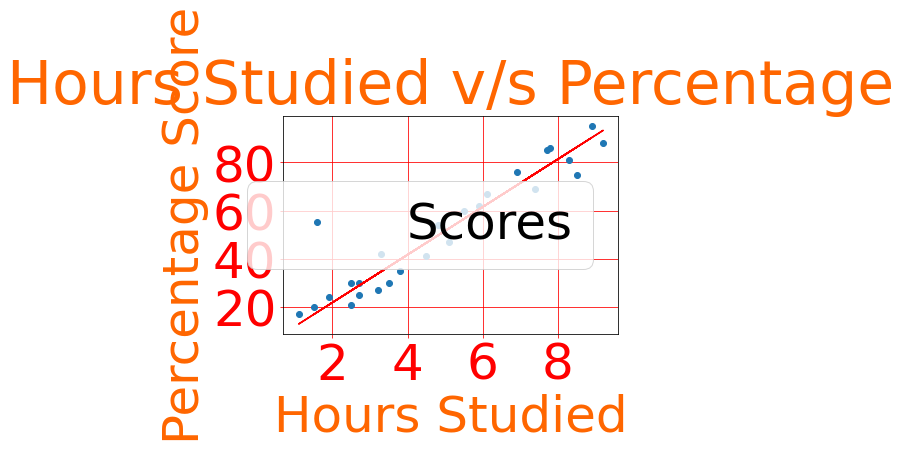

In [14]:
line = model.coef_*X+model.intercept_
ax=df.plot(x = 'Hours', y='Scores',style='o')
plt.title('Hours Studied v/s Percentage').set_color('#ff6600')
plt.xlabel('Hours Studied').set_color('#ff6600')
plt.ylabel('Percentage Score').set_color('#ff6600')
mpl.rcParams['grid.color'] = 'black'
mpl.rcParams.update({'font.size': 15})
plt.plot(X, line, color='red');
ax.tick_params(axis='x', colors ='red')
ax.tick_params(axis='y', colors ='red')
plt.grid()
plt.show()

## Step 8 : Making Predictions using our model 

<font color = "yellow">First of all , Making Predictions on our test data </font>

In [15]:
y_pred = model.predict(X_test)

In [16]:
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))  


    Actual  Predicted
5       20  16.927148
2       27  33.788269
19      69  75.445158
16      30  26.845455


**<font color = "#ff3300">Plotting Barchart to compare actual and predicted values of Testing dataset</font>**

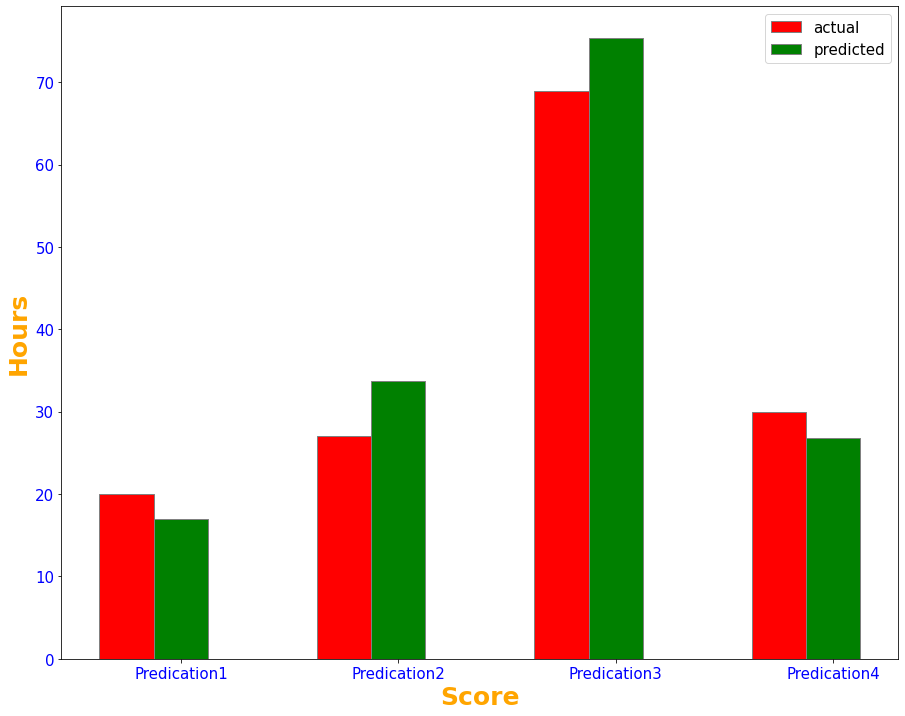

In [17]:
barWidth = 0.25
fig = plt.subplots(figsize =(15, 12)) 
 
a = y_test 
b = y_pred
 
br1 = np.arange(len(a)) 
br2 = [x + barWidth for x in br1] 

plt.bar(br1, a, color ='r', width = barWidth, 
        edgecolor ='grey', label ='actual') 
plt.bar(br2, b, color ='g', width = barWidth, 
        edgecolor ='grey', label ='predicted')  
 
plt.xlabel('Score', fontweight ='bold', fontsize = 25,color = "Orange") 
plt.ylabel('Hours', fontweight ='bold', fontsize = 25,color = "Orange") 
plt.xticks([r + barWidth for r in range(len(a))], 
        ['Predication1', 'Predication2', 'Predication3', 'Predication4'])
plt.gca().tick_params(axis='x', labelcolor='blue')
plt.gca().tick_params(axis='y', labelcolor='blue')
 
plt.legend()
plt.show()

## Step 9 : Model Evaluation

In [18]:
from sklearn.metrics import  mean_absolute_error,mean_squared_error, r2_score 
print('Mean Absolute Error :', 
      mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error :', 
      mean_squared_error(y_test, y_pred))
print('R2 Score :', 
      r2_score(y_test, y_pred))

Mean Absolute Error : 4.8652060192653295
Mean Squared Error : 26.753558100750784
R2 Score : 0.926752749895275


### What will be the predicted score if a student studies for 9.25hrs/day?

In [19]:
res = model.predict([[9.25]])
print("Predicted score for a student who studies for 9.25hrs/day is : {} ".format(res[0]))

Predicted score for a student who studies for 9.25hrs/day is : 93.7940249035965 


### <font color = "yellow">So, The predicted score of a student who studies for 9.25 hrs/day is <font color = "red">93.794% </font></font>

# <center>End of Task 1</center>
# <center>Thank You</center>
